In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand

## Boolean Statements ##

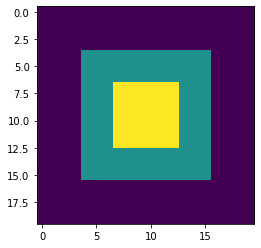

In [2]:
# Creating an image
img1 = np.zeros((20, 20)) + 3 
img1[4:-4, 4:-4] = 6 
img1[7:-7, 7:-7] = 9
plt.imshow(img1)

In [3]:
# Let's filter out all values larger than 2 and less than 6. 
index1 = img1 > 2
index2 = img1 < 6
compound_index = index1 & index2

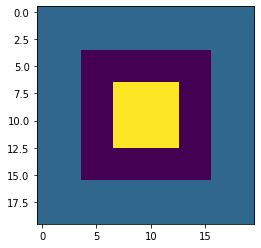

In [4]:
# The compound statement can alternatively be written as 
compound_index = (img1 > 3) & (img1 < 7)
img2 = np.copy(img1)
img2[compound_index] = 0
plt.imshow(img2)

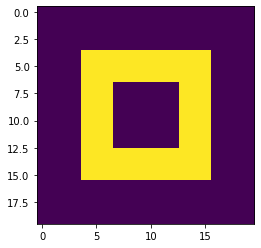

In [7]:
# Making the boolean arrays even more complex 
index3 = img1 == 9
index4 = (index1 & index2) | index3
img3 = np.copy(img1)
img3[index4] = 0
img3
plt.imshow(img3)

In [8]:
img3


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 6., 6., 0., 0., 0., 0., 0., 0., 6., 6., 6.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 6., 6., 0., 0., 0., 0., 0., 0., 6., 6., 6.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 6., 6., 0., 0., 0., 0., 0., 0., 6., 6., 6.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 6.

In [9]:
# Creating a 100-element array with random values 
# from a standard normal distribution or, in other 
# words, a Gaussian distribution.
# The sigma is 1 and the mean is 0.
a = rand.randn(100)

In [10]:
# Here we generate an index for filtering 
# out undesired elements.
index = a > 0.2
b = a[index]

In [11]:
index[:10]

array([False,  True,  True, False, False,  True,  True, False, False,
       False])

In [12]:
# note that b is not sparse
b[:10]

array([0.2591709 , 1.66778028, 1.44383443, 1.96098433, 0.44215444,
       0.26091792, 1.18807685, 1.23009034, 0.30800867, 0.71740431])

In [13]:
# and its not the same as a
a[:10]

array([ 0.18669135,  0.2591709 ,  1.66778028, -1.04314293, -2.88210364,
        1.44383443,  1.96098433, -0.00683398, -0.92888182, -0.74792375])

In [14]:
# We execute some operation on the desired elements. 
b = b ** 2 - 2

In [15]:
b[:10]

array([-1.93283045,  0.78149106,  0.08465785,  1.84545955, -1.80449945,
       -1.93192184, -0.5884734 , -0.48687777, -1.90513066, -1.48533105])

In [16]:
# Then we put the modified elements back into the original array.
# Note: this assignment is tricky - look at it carefully!!
a[index] = b

In [17]:
a[:10]

array([ 0.18669135, -1.93283045,  0.78149106, -1.04314293, -2.88210364,
        0.08465785,  1.84545955, -0.00683398, -0.92888182, -0.74792375])

## Binary Files ##

In [18]:
# Creating a large array
data = np.empty((1000, 1000))

In [19]:
# Saving the array with numpy.save 
np.save('test.npy', data)

In [20]:
# If space is an issue for large files, then 
# use numpy.savez instead. It is slower than 
# numpy.save because it compresses the binary # file.
np.savez('test.npz', data)

In [21]:
# Loading the data array 
newdata = np.load('test.npy')

In [22]:
os.remove('test.npy')

In [23]:
os.remove('test.npz')

```
3x + 6y − 5z = 12 
x − 3y + 2z = −2 
5x − y + 4z = 10
```

In [24]:
# left size of the equation
a = np.array([[3, 6, -5], 
              [1, -3, 2],
              [5, -1, 4]])

In [25]:
# and the right size (y)
b = np.array([12, -2, 10])

In [26]:
# Solving for the variables, where we invert A 
x = np.linalg.inv(a).dot(b)
print(x)

[1.75 1.75 0.75]


## On to SciPy ##

### Curve Fitting ###

In [27]:
from scipy.optimize import curve_fit

In [28]:
# Creating a function to model and create data 
def func(x, a, b):
    return a * x + b

In [29]:
# Generating clean data
x = np.linspace(0, 10, 100)

In [30]:
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

In [31]:
# y = x + 2
y = func(x, 1, 2)

In [32]:
y[:10]

array([2.        , 2.1010101 , 2.2020202 , 2.3030303 , 2.4040404 ,
       2.50505051, 2.60606061, 2.70707071, 2.80808081, 2.90909091])

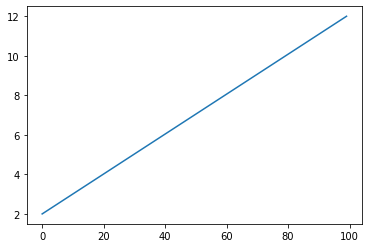

In [33]:
plt.plot(y)

In [34]:
# Adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))

In [35]:
yn [:10]

array([2.52146357, 3.46786763, 0.56643096, 3.42712813, 2.00645372,
       3.3335493 , 1.54804556, 3.25732755, 4.56252994, 4.2168943 ])

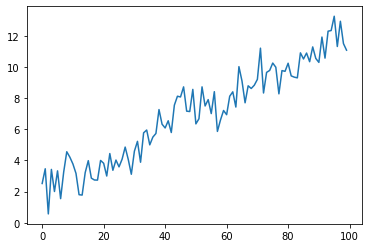

In [36]:
plt.plot(yn)

In [37]:
# Executing curve_fit on noisy data
# Note: func is the template we want to fit
# we don't know the coefficients at this point - just the data
popt, pcov = curve_fit(func, x, yn)

In [38]:
# popt returns the best fit values for parameters of 
# the given model (func).
print(popt)

[1.00958525 1.94913676]


In [39]:
# the covariance matrix - variance of parameters a, b on the diagonal
print(pcov)

[[ 0.00099929 -0.00499647]
 [-0.00499647  0.033478  ]]


Let's try a normal distribution (Gaussian)

$$P(x) = \frac{1}{{\sigma \sqrt {2\pi } }} e^{\frac{ { - \left( {x - \mu } \right)^2 } } {2\sigma ^ 2} }$$

In [40]:
# Creating a function to model and create data 
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

In [41]:
# Generating clean data
x = np.linspace(0, 10, 100) 
y = func(x, 1, 5, 2)

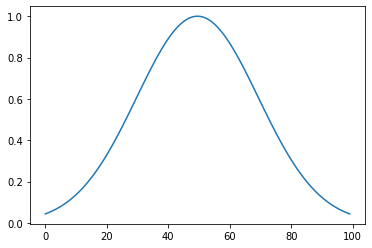

In [42]:
plt.plot(y)

In [43]:
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

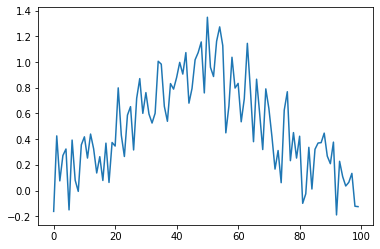

In [44]:
plt.plot(yn)

In [45]:
# Executing curve_fit on noisy data 
popt, pcov = curve_fit(func, x, yn)

In [46]:
print(popt)

[0.96053385 4.81450058 2.13316082]
